In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()
import gc

In [2]:
df1 = spark.read.load("./Crash_Analysis_System_CAS_data-1.csv", format = "csv", header = "true")

In [3]:
df2 = spark.read.load("./Crash_Analysis_System_CAS_data-2.csv", format = "csv", header = "true")

In [4]:
df3 = spark.read.load("./Crash_Analysis_System_CAS_data-3.csv", format = "csv", header = "true")

In [5]:
df4 = spark.read.load("./Crash_Analysis_System_CAS_data-4.csv", format = "csv", header = "true")

In [6]:
df5 = spark.read.load("./Crash_Analysis_System_CAS_data-5.csv", format = "csv", header = "true")

In [7]:
df6 = spark.read.load("./Crash_Analysis_System_CAS_data-6.csv", format = "csv", header = "true")

In [8]:
df7 = spark.read.load("./Crash_Analysis_System_CAS_data-7.csv", format = "csv", header = "true")

In [9]:
df8 = spark.read.load("./Crash_Analysis_System_CAS_data-8.csv", format = "csv", header = "true")

In [10]:
df9 = spark.read.load("./Crash_Analysis_System_CAS_data-9.csv", format = "csv", header = "true")

In [11]:
df10 = spark.read.load("./Crash_Analysis_System_CAS_data-10.csv", format = "csv", header = "true")

In [12]:
df11 = spark.read.load("./Crash_Analysis_System_CAS_data-11.csv", format = "csv", header = "true")

In [13]:
df12 = spark.read.load("./Crash_Analysis_System_CAS_data-12.csv", format = "csv", header = "true")

In [14]:
df13 = spark.read.load("./Crash_Analysis_System_CAS_data-13.csv", format = "csv", header = "true")

In [15]:
df14 = spark.read.load("./Crash_Analysis_System_CAS_data-14.csv", format = "csv", header = "true")

In [16]:
df15 = spark.read.load("./Crash_Analysis_System_CAS_data-15.csv", format = "csv", header = "true")

In [17]:
df = df1.union(df2)

In [18]:
df = df.union(df3)

In [19]:
df = df.union(df4)

In [20]:
df = df.union(df5)

In [21]:
df = df.union(df6).union(df7)

In [22]:
df = df.union(df8).union(df9).union(df10).union(df11).union(df12).union(df13).union(df14).union(df15)

In [23]:
del df1
del df2
del df3
del df4
del df5
del df6
del df7
del df8
del df9
del df10
del df11
del df12
del df13
del df14
del df15
gc.collect()

168

In [24]:
df.count(), len(df.columns)

(705824, 79)

In [24]:
auckland = df.filter(df.region == "Auckland Region")

In [26]:
auckland.count()

252226

In [25]:
auckland.printSchema()

root
 |-- ﻿X: string (nullable = true)
 |-- Y: string (nullable = true)
 |-- OBJECTID: string (nullable = true)
 |-- advisorySpeed: string (nullable = true)
 |-- animals: string (nullable = true)
 |-- areaUnitID: string (nullable = true)
 |-- bicycle: string (nullable = true)
 |-- bridge: string (nullable = true)
 |-- bus: string (nullable = true)
 |-- carStationWagon: string (nullable = true)
 |-- cliffBank: string (nullable = true)
 |-- crashDirectionDescription: string (nullable = true)
 |-- crashDistance: string (nullable = true)
 |-- crashFinancialYear: string (nullable = true)
 |-- crashLocation1: string (nullable = true)
 |-- crashLocation2: string (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- crashSHDescription: string (nullable = true)
 |-- crashYear: string (nullable = true)
 |-- debris: string (nullable = true)
 |-- directionRoleDescription: string (nullable = true)
 |-- ditch: string (nullable = true)
 |-- easting: string (nullable = true)
 |-- fatalCo

In [28]:
crashSeverity = auckland.groupBy('crashSeverity').count()
crashSeverity.show()

+----------------+------+
|   crashSeverity| count|
+----------------+------+
|Non-Injury Crash|192093|
|   Serious Crash|  8757|
|     Fatal Crash|  1080|
|     Minor Crash| 50296|
+----------------+------+



In [29]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
plot1 = crashSeverity.toPandas()


In [31]:
x = plot1["crashSeverity"]


In [32]:
y =plot1["count"]

<BarContainer object of 4 artists>

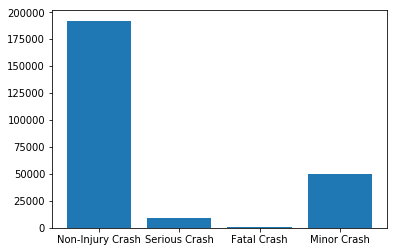

In [33]:
plt.bar(x,y)

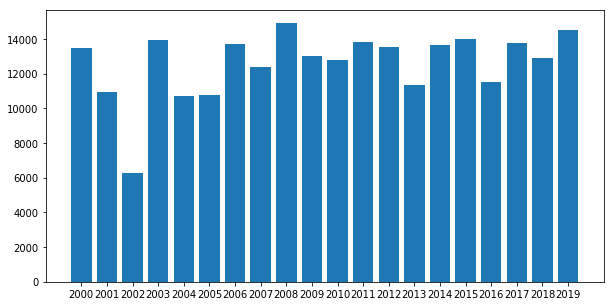

In [34]:
crash_year = auckland.groupBy('crashYear').count()
plot2 = crash_year.toPandas()
x = plot2["crashYear"].sort_values()
y = plot2["count"]
plt.figure(figsize = (10,5))
plt.bar(x,y)
plt.show()

In [35]:
crashlocation = auckland.groupBy('crashLocation1').count().orderBy('count', ascending=False)
crashlocation.show()

+--------------------+-----+
|      crashLocation1|count|
+--------------------+-----+
|               SH 1N|27883|
|    GREAT SOUTH ROAD| 8036|
|               SH 16| 7836|
|    GREAT NORTH ROAD| 5337|
|               SH 20| 3034|
|       DOMINION ROAD| 2676|
|      NEW NORTH ROAD| 2119|
|      TI RAKAU DRIVE| 1771|
|   MOUNT ALBERT ROAD| 1616|
|      PAKURANGA ROAD| 1600|
|     EAST COAST ROAD| 1575|
|            QUEEN ST| 1540|
|MOUNT WELLINGTON ...| 1466|
|        MANUKAU ROAD| 1461|
|       TE ATATU ROAD| 1435|
|        LINCOLN ROAD| 1434|
|         MASSEY ROAD| 1428|
|    EAST TAMAKI ROAD| 1363|
|          BEACH ROAD| 1304|
|HIBISCUS COAST HI...| 1277|
+--------------------+-----+
only showing top 20 rows



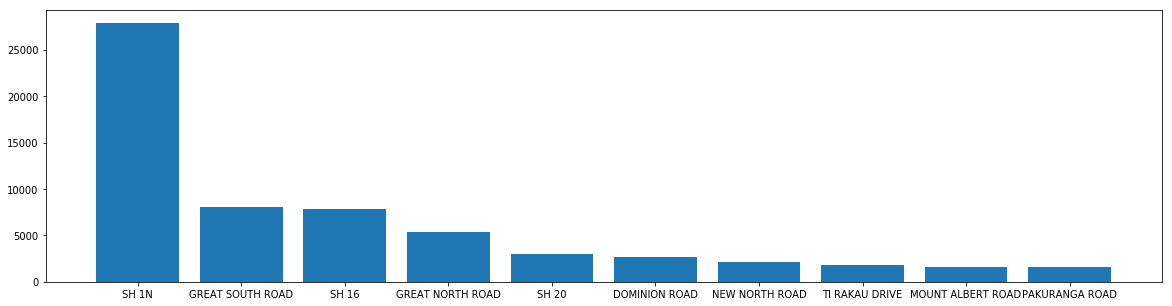

In [36]:
plot3 = crashlocation.toPandas()
plt.figure(figsize = (20,5))
x = plot3['crashLocation1'][0:10]
y = plot3['count'][0:10]
plt.bar(x,y)
plt.show()

In [37]:
weather = auckland.groupBy('weatherA').count()
weather.show()

+-------------+------+
|     weatherA| count|
+-------------+------+
|   Light rain| 40783|
|   Heavy rain|  9865|
|Hail or Sleet|     1|
|         Fine|194607|
|         Snow|    34|
|  Mist or Fog|  1935|
|         Null|  5001|
+-------------+------+



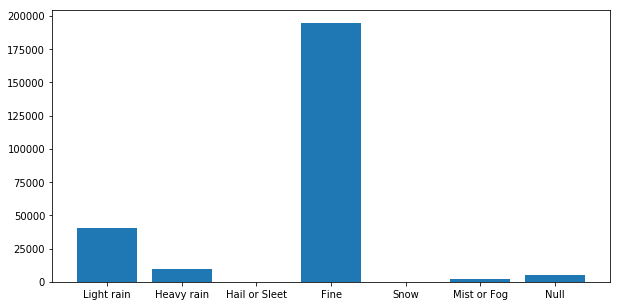

In [38]:
plot4 = weather.toPandas()
x = plot4['weatherA']
y = plot4['count']
plt.figure(figsize = (10,5))
plt.bar(x,y)
plt.show()

In [39]:
del plot1
del plot2
del plot3
del plot4
gc.collect()

9183

In [40]:
weather_severity = auckland.groupBy('weatherA', 'crashSeverity').count().orderBy('count', ascending=False)
weather_severity.show()

+-----------+----------------+------+
|   weatherA|   crashSeverity| count|
+-----------+----------------+------+
|       Fine|Non-Injury Crash|147464|
|       Fine|     Minor Crash| 39295|
| Light rain|Non-Injury Crash| 31136|
| Light rain|     Minor Crash|  8223|
| Heavy rain|Non-Injury Crash|  7465|
|       Fine|   Serious Crash|  6973|
|       Null|Non-Injury Crash|  4593|
| Heavy rain|     Minor Crash|  2010|
|Mist or Fog|Non-Injury Crash|  1414|
| Light rain|   Serious Crash|  1289|
|       Fine|     Fatal Crash|   875|
|Mist or Fog|     Minor Crash|   420|
| Heavy rain|   Serious Crash|   339|
|       Null|     Minor Crash|   336|
| Light rain|     Fatal Crash|   135|
|Mist or Fog|   Serious Crash|    85|
|       Null|   Serious Crash|    69|
| Heavy rain|     Fatal Crash|    51|
|       Snow|Non-Injury Crash|    20|
|Mist or Fog|     Fatal Crash|    16|
+-----------+----------------+------+
only showing top 20 rows



In [41]:
auckland.groupBy('weatherA').count().show()

+-------------+------+
|     weatherA| count|
+-------------+------+
|   Light rain| 40783|
|   Heavy rain|  9865|
|Hail or Sleet|     1|
|         Fine|194607|
|         Snow|    34|
|  Mist or Fog|  1935|
|         Null|  5001|
+-------------+------+



In [40]:
auckland.columns

['\ufeffX',
 'Y',
 'OBJECTID',
 'advisorySpeed',
 'animals',
 'areaUnitID',
 'bicycle',
 'bridge',
 'bus',
 'carStationWagon',
 'cliffBank',
 'crashDirectionDescription',
 'crashDistance',
 'crashFinancialYear',
 'crashLocation1',
 'crashLocation2',
 'crashSeverity',
 'crashSHDescription',
 'crashYear',
 'debris',
 'directionRoleDescription',
 'ditch',
 'easting',
 'fatalCount',
 'fence',
 'flatHill',
 'guardRail',
 'holiday',
 'houseOrBuilding',
 'intersectionMidblock',
 'junctionType',
 'kerb',
 'light',
 'meshblockId',
 'minorInjuryCount',
 'moped',
 'motorcycle',
 'northing',
 'NumberOfLanes',
 'objectThrownOrDropped',
 'otherObject',
 'otherVehicleType',
 'outdatedLocationDescription',
 'overBank',
 'parkedVehicle',
 'pedestrian',
 'phoneBoxEtc',
 'postOrPole',
 'region',
 'roadCharacter',
 'roadCurvature',
 'roadLane',
 'roadMarkings',
 'roadSurface',
 'roadworks',
 'schoolBus',
 'seriousInjuryCount',
 'slipOrFlood',
 'speedLimit',
 'strayAnimal',
 'streetLight',
 'suv',
 'taxi',

In [25]:
colnames = auckland.columns

In [26]:
num_rows = auckland.count()
num_rows
from pyspark.sql.functions import isnan, when, count, col

In [27]:
saved_col = []
for i in range(0, len(colnames)-1):
    col_name = colnames[i]
    num_space = auckland.select([count(when(isnan(col_name) | col(col_name).isNull(),True))]).first()[0]
    proportation = num_space/num_rows
    if proportation <= 0.5:
        saved_col.append(col_name)
saved_col

['\ufeffX',
 'Y',
 'OBJECTID',
 'areaUnitID',
 'bicycle',
 'bus',
 'carStationWagon',
 'crashDirectionDescription',
 'crashDistance',
 'crashFinancialYear',
 'crashLocation1',
 'crashLocation2',
 'crashSeverity',
 'crashSHDescription',
 'crashYear',
 'directionRoleDescription',
 'easting',
 'fatalCount',
 'flatHill',
 'intersectionMidblock',
 'junctionType',
 'light',
 'meshblockId',
 'minorInjuryCount',
 'moped',
 'motorcycle',
 'northing',
 'NumberOfLanes',
 'otherVehicleType',
 'outdatedLocationDescription',
 'region',
 'roadCharacter',
 'roadCurvature',
 'roadLane',
 'roadSurface',
 'schoolBus',
 'seriousInjuryCount',
 'speedLimit',
 'streetLight',
 'suv',
 'taxi',
 'tlaId',
 'tlaName',
 'trafficControl',
 'truck',
 'unknownVehicleType',
 'urban',
 'vanOrUtility',
 'weatherA']

In [28]:
df_1 = auckland.select(saved_col)
df_1.count(),len(df_1.columns)

(252226, 49)

In [29]:
columns_to_drop = ['easting','northing','tlaId','tlaName']
df_1 = df_1.drop(*columns_to_drop)
len(df_1.columns)

45

In [30]:
columns_to_drop = ['OBJECTID','crashDirectionDescription','crashDistance']
df_1 = df_1.drop(*columns_to_drop)
len(df_1.columns)

42

In [49]:
busdf = df_1.select('bus')
busdf.describe().show()

+-------+--------------------+
|summary|                 bus|
+-------+--------------------+
|  count|              252226|
|   mean|0.020997042335048725|
| stddev|  1.0050852950113083|
|    min|                   0|
|    max|                 500|
+-------+--------------------+



In [50]:
df_1.count()
del busdf

In [31]:
df_1 = df_1.filter(df_1.bus <= 3) 
df_1.count()

252225

In [31]:
van = df_1.select('vanOrUtility')
van.describe().show()

+-------+-------------------+
|summary|       vanOrUtility|
+-------+-------------------+
|  count|             252226|
|   mean|0.14921142150293784|
| stddev| 0.3933505600673658|
|    min|                  0|
|    max|                 50|
+-------+-------------------+



In [32]:
df_1 = df_1.filter(df_1.vanOrUtility <= 5)
print(df_1.count())
del van
gc.collect()

252225


148

In [33]:
df_1 = df_1.na.drop()

In [34]:
df_1.count()

251514

In [35]:
df_1 = df_1.filter(df_1.weatherA != 'Null')
df_1 = df_1.filter(df_1.streetLight != 'Null')
df_1.count()

201512

In [57]:
nil_rows1 = df_1.filter(df_1.trafficControl == "Nil").count()
nil_rows1

110857

In [58]:
nil_rows2 = df_1.filter(df_1.roadCharacter == "Nil").count()
nil_rows2

191412

In [59]:
nil_rows1/df_1.count(), nil_rows2/df_1.count()

(0.5501260470840447, 0.9498789153995791)

In [36]:
columns_to_drop = ['trafficControl', 'roadCharacter']
df_1 = df_1.drop(*columns_to_drop)
len(df_1.columns)

40

In [61]:
df_1.printSchema()

root
 |-- ﻿X: string (nullable = true)
 |-- Y: string (nullable = true)
 |-- areaUnitID: string (nullable = true)
 |-- bicycle: string (nullable = true)
 |-- bus: string (nullable = true)
 |-- carStationWagon: string (nullable = true)
 |-- crashFinancialYear: string (nullable = true)
 |-- crashLocation1: string (nullable = true)
 |-- crashLocation2: string (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- crashSHDescription: string (nullable = true)
 |-- crashYear: string (nullable = true)
 |-- directionRoleDescription: string (nullable = true)
 |-- fatalCount: string (nullable = true)
 |-- flatHill: string (nullable = true)
 |-- intersectionMidblock: string (nullable = true)
 |-- junctionType: string (nullable = true)
 |-- light: string (nullable = true)
 |-- meshblockId: string (nullable = true)
 |-- minorInjuryCount: string (nullable = true)
 |-- moped: string (nullable = true)
 |-- motorcycle: string (nullable = true)
 |-- NumberOfLanes: string (nullable = true)
 

In [37]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [38]:
df_1 = df_1.drop('region')
len(df_1.columns)

39

In [39]:
cols = ['\ufeffX','Y']
df_1 = df_1.drop(*cols)
len(df_1.columns)

37

In [65]:
df_1.columns

['areaUnitID',
 'bicycle',
 'bus',
 'carStationWagon',
 'crashFinancialYear',
 'crashLocation1',
 'crashLocation2',
 'crashSeverity',
 'crashSHDescription',
 'crashYear',
 'directionRoleDescription',
 'fatalCount',
 'flatHill',
 'intersectionMidblock',
 'junctionType',
 'light',
 'meshblockId',
 'minorInjuryCount',
 'moped',
 'motorcycle',
 'NumberOfLanes',
 'otherVehicleType',
 'outdatedLocationDescription',
 'roadCurvature',
 'roadLane',
 'roadSurface',
 'schoolBus',
 'seriousInjuryCount',
 'speedLimit',
 'streetLight',
 'suv',
 'taxi',
 'truck',
 'unknownVehicleType',
 'urban',
 'vanOrUtility',
 'weatherA']

In [40]:
df_2 = df_1.select(df_1.areaUnitID.cast("float"),
                   df_1.bicycle.cast("float"),
                   df_1.carStationWagon.cast("float"),
                   df_1.crashFinancialYear.cast('float'),
                   df_1.crashLocation1,
                   df_1.crashLocation2,
                   df_1.crashSeverity,
                   df_1.crashSHDescription,
                   df_1.crashYear.cast("float"),
                   df_1.directionRoleDescription,
                   df_1.fatalCount.cast("float"),
                   df_1.flatHill,
                   df_1.intersectionMidblock,
                   df_1.junctionType,
                   df_1.light,
                   df_1.meshblockId.cast("float"),
                   df_1.minorInjuryCount.cast("float"),
                   df_1.moped.cast("float"),
                   df_1.motorcycle.cast("float"),
                   df_1.NumberOfLanes.cast("float"),
                   df_1.otherVehicleType.cast("float"),
                   df_1.outdatedLocationDescription,
                   df_1.roadCurvature,
                   df_1.roadLane,
                   df_1.roadSurface,
                   df_1.schoolBus.cast("float"),
                   df_1.seriousInjuryCount.cast("float"),
                   df_1.speedLimit.cast("float"),
                   df_1.streetLight,
                   df_1.suv.cast("float"),
                   df_1.taxi.cast("float"),
                   df_1.truck.cast("float"),
                   df_1.unknownVehicleType.cast("float"),
                   df_1.urban,
                   df_1.vanOrUtility.cast("float"),
                   df_1.weatherA)
                   
                   
                   

In [67]:
df_2.printSchema()

root
 |-- areaUnitID: float (nullable = true)
 |-- bicycle: float (nullable = true)
 |-- carStationWagon: float (nullable = true)
 |-- crashFinancialYear: float (nullable = true)
 |-- crashLocation1: string (nullable = true)
 |-- crashLocation2: string (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- crashSHDescription: string (nullable = true)
 |-- crashYear: float (nullable = true)
 |-- directionRoleDescription: string (nullable = true)
 |-- fatalCount: float (nullable = true)
 |-- flatHill: string (nullable = true)
 |-- intersectionMidblock: string (nullable = true)
 |-- junctionType: string (nullable = true)
 |-- light: string (nullable = true)
 |-- meshblockId: float (nullable = true)
 |-- minorInjuryCount: float (nullable = true)
 |-- moped: float (nullable = true)
 |-- motorcycle: float (nullable = true)
 |-- NumberOfLanes: float (nullable = true)
 |-- otherVehicleType: float (nullable = true)
 |-- outdatedLocationDescription: string (nullable = true)
 |-- roa

In [41]:
alchol_df = spark.read.load("grog.csv", format = "csv", header = "true")

In [69]:
alchol_df.show()

+---+----------------+----------------+----------------+----------+----+
|_c0|            Beer|            Wine|          Spirit|   Country|Year|
+---+----------------+----------------+----------------+----------+----+
|  1|            5.24|            2.86|            1.81| Australia|1998|
|  2|            5.15|            2.87|            1.77| Australia|1999|
|  3|            5.06|            2.94|            1.88| Australia|2000|
|  4|            5.07|            2.95|            2.07| Australia|2001|
|  5|             4.8|            2.91|            1.81| Australia|2002|
|  6|            4.97|            3.01|            1.86| Australia|2003|
|  7|            4.68|            3.07|            2.06| Australia|2004|
|  8|            4.58|            3.13|            2.12| Australia|2005|
|  9|            4.57|            3.11|            2.15| Australia|2006|
| 10|4.49995484047518|2.59259649909302| 1.7714486604318|NewZealand|1998|
| 11|4.28379433107245|2.65169387971947|1.6405117892

In [70]:
alchol_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- Beer: string (nullable = true)
 |-- Wine: string (nullable = true)
 |-- Spirit: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Year: string (nullable = true)



In [42]:
nz_sum = alchol_df.filter(alchol_df.Country == 'NewZealand')
nz_sum.show()
nz_sum.printSchema()

+---+----------------+----------------+----------------+----------+----+
|_c0|            Beer|            Wine|          Spirit|   Country|Year|
+---+----------------+----------------+----------------+----------+----+
| 10|4.49995484047518|2.59259649909302| 1.7714486604318|NewZealand|1998|
| 11|4.28379433107245|2.65169387971947|1.64051178920809|NewZealand|1999|
| 12|4.38780862118929|2.74667996149141|1.80251141731929|NewZealand|2000|
| 13|4.25076364384841|2.62968684202698|2.04354951412461|NewZealand|2001|
| 14|4.23134594904052|2.77336529499246|1.88528875596702|NewZealand|2002|
| 15|4.21786562098825|2.87833204197447|2.04480233703727|NewZealand|2003|
| 16| 4.1996066148245|2.87904802569341|2.00834535948209|NewZealand|2004|
| 17| 4.1623257976577|2.99934081900903|2.22233338333326|NewZealand|2005|
| 18| 3.9594093294588|3.08942254209033|2.20116812845087|NewZealand|2006|
+---+----------------+----------------+----------------+----------+----+

root
 |-- _c0: string (nullable = true)
 |-- Beer:

In [43]:
nz_alchol = nz_sum.select(nz_sum.Beer.cast("float"),
                          nz_sum.Wine.cast("float"),
                          nz_sum.Spirit.cast("float"),
                          nz_sum.Country,
                          nz_sum.Year.cast("float"))
nz_alchol.printSchema()

root
 |-- Beer: float (nullable = true)
 |-- Wine: float (nullable = true)
 |-- Spirit: float (nullable = true)
 |-- Country: string (nullable = true)
 |-- Year: float (nullable = true)



In [44]:
nz_alchol = nz_alchol.withColumn('sum', nz_alchol.Beer + nz_alchol.Wine + nz_alchol.Spirit)


In [45]:
nz = nz_alchol.select(nz_alchol.Year, nz_alchol.sum)
nz.show()

+------+--------+
|  Year|     sum|
+------+--------+
|1998.0|   8.864|
|1999.0|   8.576|
|2000.0|   8.937|
|2001.0|   8.924|
|2002.0|8.889999|
|2003.0|   9.141|
|2004.0|   9.087|
|2005.0|9.384001|
|2006.0|    9.25|
+------+--------+



In [46]:
df_3 = df_2.filter((df_2.crashYear <= 2006) & (df_2.crashYear >= 2000))
df_3.count()

90391

In [47]:
overall = df_3.join(nz, df_3.crashYear == nz.Year, "left").drop('crashYear')
overall.count(), len(overall.columns)

(90391, 37)

In [50]:
overall.columns

['areaUnitID',
 'bicycle',
 'carStationWagon',
 'crashFinancialYear',
 'crashLocation1',
 'crashLocation2',
 'crashSeverity',
 'crashSHDescription',
 'directionRoleDescription',
 'fatalCount',
 'flatHill',
 'intersectionMidblock',
 'junctionType',
 'light',
 'meshblockId',
 'minorInjuryCount',
 'moped',
 'motorcycle',
 'NumberOfLanes',
 'otherVehicleType',
 'outdatedLocationDescription',
 'roadCurvature',
 'roadLane',
 'roadSurface',
 'schoolBus',
 'seriousInjuryCount',
 'speedLimit',
 'streetLight',
 'suv',
 'taxi',
 'truck',
 'unknownVehicleType',
 'urban',
 'vanOrUtility',
 'weatherA',
 'Year',
 'sum']

In [48]:
del df_1
del df_2
del df_3
del alchol_df
del nz_sum
del nz_alchol
del nz
del auckland
gc.collect()

373

In [49]:
overall = overall.drop(*['crashLocation1','crashLocation2'])
len(overall.columns)

35

In [50]:
overall = overall.drop('directionRoleDescription')
len(overall.columns)

34

In [51]:
overall = overall.drop(*['meshblockId','outdatedLocationDescription'])
len(overall.columns)

32

In [82]:
overall.groupby('junctionType','crashSeverity').count().orderBy('count', ascending=False).show()

+-------------+----------------+-----+
| junctionType|   crashSeverity|count|
+-------------+----------------+-----+
|Nil (Default)|Non-Injury Crash|30141|
|   T Junction|Non-Injury Crash|18363|
|   Crossroads|Non-Injury Crash| 7987|
|Nil (Default)|     Minor Crash| 7333|
|     Driveway|Non-Injury Crash| 6936|
|   T Junction|     Minor Crash| 3997|
|   Roundabout|Non-Injury Crash| 3568|
|   Y Junction|Non-Injury Crash| 2279|
|     Multileg|Non-Injury Crash| 1844|
|   Crossroads|     Minor Crash| 1785|
|Nil (Default)|   Serious Crash| 1558|
|     Driveway|     Minor Crash| 1450|
|   T Junction|   Serious Crash|  729|
|   Y Junction|     Minor Crash|  470|
|   Roundabout|     Minor Crash|  462|
|Nil (Default)|     Fatal Crash|  332|
|     Multileg|     Minor Crash|  320|
|   Crossroads|   Serious Crash|  268|
|     Driveway|   Serious Crash|  232|
|   Y Junction|   Serious Crash|   88|
+-------------+----------------+-----+
only showing top 20 rows



In [52]:
overall = overall.drop('junctionType')
len(overall.columns)

31

In [84]:
overall.groupby('light','crashSeverity').count().orderBy('count', ascending=False).show()

+----------+----------------+-----+
|     light|   crashSeverity|count|
+----------+----------------+-----+
|Bright sun|Non-Injury Crash|26588|
|  Overcast|Non-Injury Crash|20884|
|      Dark|Non-Injury Crash|19782|
|Bright sun|     Minor Crash| 5776|
|      Dark|     Minor Crash| 4638|
|  Overcast|     Minor Crash| 4563|
|  Twilight|Non-Injury Crash| 3824|
|      Dark|   Serious Crash| 1112|
|Bright sun|   Serious Crash| 1017|
|  Twilight|     Minor Crash|  835|
|  Overcast|   Serious Crash|  697|
|      Dark|     Fatal Crash|  217|
|  Twilight|   Serious Crash|  167|
|Bright sun|     Fatal Crash|  127|
|  Overcast|     Fatal Crash|   96|
|   Unknown|Non-Injury Crash|   40|
|  Twilight|     Fatal Crash|   22|
|   Unknown|     Minor Crash|    5|
|   Unknown|   Serious Crash|    1|
+----------+----------------+-----+



In [53]:
overall = overall.drop('light')
len(overall.columns)

30

In [86]:
overall.groupby('NumberOfLanes','crashSeverity').count().orderBy('count', ascending=False).show()

+-------------+----------------+-----+
|NumberOfLanes|   crashSeverity|count|
+-------------+----------------+-----+
|          2.0|Non-Injury Crash|39714|
|          4.0|Non-Injury Crash|15161|
|          2.0|     Minor Crash| 9421|
|          3.0|Non-Injury Crash| 7538|
|          4.0|     Minor Crash| 3012|
|          5.0|Non-Injury Crash| 2369|
|          6.0|Non-Injury Crash| 2291|
|          1.0|Non-Injury Crash| 2089|
|          2.0|   Serious Crash| 1997|
|          3.0|     Minor Crash| 1724|
|          0.0|Non-Injury Crash| 1571|
|          5.0|     Minor Crash|  546|
|          4.0|   Serious Crash|  491|
|          6.0|     Minor Crash|  484|
|          1.0|     Minor Crash|  446|
|          2.0|     Fatal Crash|  349|
|          8.0|Non-Injury Crash|  255|
|          3.0|   Serious Crash|  232|
|          7.0|Non-Injury Crash|  130|
|          0.0|     Minor Crash|  117|
+-------------+----------------+-----+
only showing top 20 rows



In [54]:
overall = overall.drop('NumberOfLanes')
len(overall.columns)

29

In [88]:
overall.groupby('roadSurface','crashSeverity').count().orderBy('count', ascending=False).show()

+-----------+----------------+-----+
|roadSurface|   crashSeverity|count|
+-----------+----------------+-----+
|     Sealed|Non-Injury Crash|70789|
|     Sealed|     Minor Crash|15715|
|     Sealed|   Serious Crash| 2951|
|     Sealed|     Fatal Crash|  455|
|   Unsealed|Non-Injury Crash|  329|
|   Unsealed|     Minor Crash|  102|
|   Unsealed|   Serious Crash|   43|
|   Unsealed|     Fatal Crash|    7|
+-----------+----------------+-----+



In [55]:
overall = overall.drop('roadSurface')
len(overall.columns)

28

In [90]:
overall.groupby('schoolBus','crashSeverity').count().orderBy('count', ascending=False).show()

+---------+----------------+-----+
|schoolBus|   crashSeverity|count|
+---------+----------------+-----+
|      0.0|Non-Injury Crash|71095|
|      0.0|     Minor Crash|15807|
|      0.0|   Serious Crash| 2990|
|      0.0|     Fatal Crash|  462|
|      1.0|Non-Injury Crash|   23|
|      1.0|     Minor Crash|   10|
|      1.0|   Serious Crash|    4|
+---------+----------------+-----+



In [56]:
overall = overall.drop('schoolBus')
len(overall.columns)

27

In [92]:
overall.groupby('taxi','crashSeverity').count().orderBy('count', ascending=False).show()

+----+----------------+-----+
|taxi|   crashSeverity|count|
+----+----------------+-----+
| 0.0|Non-Injury Crash|69784|
| 0.0|     Minor Crash|15533|
| 0.0|   Serious Crash| 2948|
| 1.0|Non-Injury Crash| 1295|
| 0.0|     Fatal Crash|  455|
| 1.0|     Minor Crash|  281|
| 1.0|   Serious Crash|   43|
| 2.0|Non-Injury Crash|   39|
| 1.0|     Fatal Crash|    7|
| 2.0|   Serious Crash|    3|
| 2.0|     Minor Crash|    3|
+----+----------------+-----+



In [57]:
overall = overall.drop('taxi')
len(overall.columns)

26

In [58]:
gc.collect()

180

In [95]:
overall.groupby('truck','crashSeverity').count().orderBy('count', ascending=False).show()

+-----+----------------+-----+
|truck|   crashSeverity|count|
+-----+----------------+-----+
|  0.0|Non-Injury Crash|65317|
|  0.0|     Minor Crash|14717|
|  1.0|Non-Injury Crash| 5602|
|  0.0|   Serious Crash| 2757|
|  1.0|     Minor Crash| 1041|
|  0.0|     Fatal Crash|  397|
|  1.0|   Serious Crash|  222|
|  2.0|Non-Injury Crash|  195|
|  1.0|     Fatal Crash|   65|
|  2.0|     Minor Crash|   53|
|  2.0|   Serious Crash|   15|
|  3.0|     Minor Crash|    5|
|  3.0|Non-Injury Crash|    4|
|  5.0|     Minor Crash|    1|
+-----+----------------+-----+



In [58]:
overall = overall.drop('truck')
len(overall.columns)

25

In [97]:
overall.groupby('unknownVehicleType','crashSeverity').count().orderBy('count', ascending=False).show()

+------------------+----------------+-----+
|unknownVehicleType|   crashSeverity|count|
+------------------+----------------+-----+
|               0.0|Non-Injury Crash|71118|
|               0.0|     Minor Crash|15817|
|               0.0|   Serious Crash| 2994|
|               0.0|     Fatal Crash|  462|
+------------------+----------------+-----+



In [59]:
overall = overall.drop('unknownVehicleType')
len(overall.columns)

24

In [99]:
overall.groupby('vanOrUtility','crashSeverity').count().orderBy('count', ascending=False).show()

+------------+----------------+-----+
|vanOrUtility|   crashSeverity|count|
+------------+----------------+-----+
|         0.0|Non-Injury Crash|60764|
|         0.0|     Minor Crash|13468|
|         1.0|Non-Injury Crash| 9714|
|         0.0|   Serious Crash| 2571|
|         1.0|     Minor Crash| 2208|
|         2.0|Non-Injury Crash|  623|
|         1.0|   Serious Crash|  404|
|         0.0|     Fatal Crash|  374|
|         2.0|     Minor Crash|  135|
|         1.0|     Fatal Crash|   85|
|         2.0|   Serious Crash|   18|
|         3.0|Non-Injury Crash|   16|
|         3.0|     Minor Crash|    5|
|         2.0|     Fatal Crash|    3|
|         4.0|Non-Injury Crash|    1|
|         3.0|   Serious Crash|    1|
|         4.0|     Minor Crash|    1|
+------------+----------------+-----+



In [60]:
overall = overall.drop('vanOrUtility')
len(overall.columns)

23

In [101]:
overall.groupby('weatherA','crashSeverity').count().orderBy('count', ascending=False).show()

+-----------+----------------+-----+
|   weatherA|   crashSeverity|count|
+-----------+----------------+-----+
|       Fine|Non-Injury Crash|54853|
| Light rain|Non-Injury Crash|12550|
|       Fine|     Minor Crash|12098|
| Heavy rain|Non-Injury Crash| 3172|
| Light rain|     Minor Crash| 2853|
|       Fine|   Serious Crash| 2309|
| Heavy rain|     Minor Crash|  729|
|Mist or Fog|Non-Injury Crash|  542|
| Light rain|   Serious Crash|  492|
|       Fine|     Fatal Crash|  378|
| Heavy rain|   Serious Crash|  158|
|Mist or Fog|     Minor Crash|  131|
| Light rain|     Fatal Crash|   65|
|Mist or Fog|   Serious Crash|   34|
| Heavy rain|     Fatal Crash|   16|
|       Snow|     Minor Crash|    6|
|Mist or Fog|     Fatal Crash|    3|
|       Snow|   Serious Crash|    1|
|       Snow|Non-Injury Crash|    1|
+-----------+----------------+-----+



In [61]:
overall = overall.drop('weatherA')
len(overall.columns)

22

In [103]:
overall.columns

['areaUnitID',
 'bicycle',
 'carStationWagon',
 'crashFinancialYear',
 'crashSeverity',
 'crashSHDescription',
 'fatalCount',
 'flatHill',
 'intersectionMidblock',
 'minorInjuryCount',
 'moped',
 'motorcycle',
 'otherVehicleType',
 'roadCurvature',
 'roadLane',
 'seriousInjuryCount',
 'speedLimit',
 'streetLight',
 'suv',
 'urban',
 'Year',
 'sum']

In [104]:
overall.count(), len(overall.columns)

(90391, 22)

In [63]:
gc.collect()

0

In [106]:
overall.groupby('areaUnitID','crashSeverity').count().orderBy('count', ascending=False).show()

+----------+----------------+-----+
|areaUnitID|   crashSeverity|count|
+----------+----------------+-----+
|  520500.0|Non-Injury Crash| 1914|
|  514102.0|Non-Injury Crash| 1779|
|  514103.0|Non-Injury Crash| 1272|
|  524604.0|Non-Injury Crash| 1079|
|  507900.0|Non-Injury Crash|  959|
|  521901.0|Non-Injury Crash|  925|
|  520202.0|Non-Injury Crash|  857|
|  515202.0|Non-Injury Crash|  855|
|  509800.0|Non-Injury Crash|  799|
|  509702.0|Non-Injury Crash|  763|
|  515700.0|Non-Injury Crash|  747|
|  511303.0|Non-Injury Crash|  709|
|  514200.0|Non-Injury Crash|  685|
|  514101.0|Non-Injury Crash|  651|
|  513301.0|Non-Injury Crash|  646|
|  516001.0|Non-Injury Crash|  611|
|  524602.0|Non-Injury Crash|  566|
|  514801.0|Non-Injury Crash|  524|
|  508420.0|Non-Injury Crash|  507|
|  516003.0|Non-Injury Crash|  507|
+----------+----------------+-----+
only showing top 20 rows



In [64]:
overall = overall.drop('areaUnitID')
gc.collect()

9

In [65]:
overall = overall.drop('crashFinancialYear')

In [69]:
overall.groupby('crashSHDescription','crashSeverity').count().orderBy('count', ascending=False).show()

+------------------+----------------+-----+
|crashSHDescription|   crashSeverity|count|
+------------------+----------------+-----+
|                No|Non-Injury Crash|56940|
|               Yes|Non-Injury Crash|14178|
|                No|     Minor Crash|12682|
|               Yes|     Minor Crash| 3135|
|                No|   Serious Crash| 2582|
|               Yes|   Serious Crash|  412|
|                No|     Fatal Crash|  361|
|               Yes|     Fatal Crash|  101|
+------------------+----------------+-----+



In [66]:
overall = overall.drop('crashSHDescription')
gc.collect()

14

In [71]:
overall.groupby('flatHill','crashSeverity').count().orderBy('count', ascending=False).show()

+---------+----------------+-----+
| flatHill|   crashSeverity|count|
+---------+----------------+-----+
|     Flat|Non-Injury Crash|56193|
|Hill Road|Non-Injury Crash|14898|
|     Flat|     Minor Crash|11765|
|Hill Road|     Minor Crash| 4049|
|     Flat|   Serious Crash| 2104|
|Hill Road|   Serious Crash|  890|
|     Flat|     Fatal Crash|  317|
|Hill Road|     Fatal Crash|  145|
|     Null|Non-Injury Crash|   27|
|     Null|     Minor Crash|    3|
+---------+----------------+-----+



In [67]:
overall = overall.drop('flatHill')
gc.collect()

7

In [73]:
overall.groupby('intersectionMidblock','crashSeverity').count().orderBy('count', ascending=False).show()

+--------------------+----------------+-----+
|intersectionMidblock|   crashSeverity|count|
+--------------------+----------------+-----+
|        Intersection|Non-Injury Crash|45073|
|            Midblock|Non-Injury Crash|26045|
|        Intersection|     Minor Crash| 9304|
|            Midblock|     Minor Crash| 6513|
|        Intersection|   Serious Crash| 1604|
|            Midblock|   Serious Crash| 1390|
|            Midblock|     Fatal Crash|  286|
|        Intersection|     Fatal Crash|  176|
+--------------------+----------------+-----+



In [68]:
overall = overall.drop('intersectionMidblock')
gc.collect()

7

In [75]:
overall.groupby('otherVehicleType','crashSeverity').count().orderBy('count', ascending=False).show()

+----------------+----------------+-----+
|otherVehicleType|   crashSeverity|count|
+----------------+----------------+-----+
|             0.0|Non-Injury Crash|70793|
|             0.0|     Minor Crash|15786|
|             0.0|   Serious Crash| 2982|
|             0.0|     Fatal Crash|  462|
|             1.0|Non-Injury Crash|  321|
|             1.0|     Minor Crash|   31|
|             1.0|   Serious Crash|   12|
|             2.0|Non-Injury Crash|    4|
+----------------+----------------+-----+



In [69]:
overall = overall.drop('otherVehicleType')
gc.collect()

7

In [77]:
overall.groupby('roadCurvature','crashSeverity').count().orderBy('count', ascending=False).show()

+-------------+----------------+-----+
|roadCurvature|   crashSeverity|count|
+-------------+----------------+-----+
|     Straight|Non-Injury Crash|51984|
|       Curved|Non-Injury Crash|19134|
|     Straight|     Minor Crash|11166|
|       Curved|     Minor Crash| 4651|
|     Straight|   Serious Crash| 1898|
|       Curved|   Serious Crash| 1096|
|     Straight|     Fatal Crash|  237|
|       Curved|     Fatal Crash|  225|
+-------------+----------------+-----+



In [70]:
overall = overall.drop('roadCurvature')
gc.collect()

7

In [79]:
overall.groupby('roadLane','crashSeverity').count().orderBy('count', ascending=False).show()

+--------+----------------+-----+
|roadLane|   crashSeverity|count|
+--------+----------------+-----+
|   2-way|Non-Injury Crash|58740|
|   2-way|     Minor Crash|13316|
|   1-way|Non-Injury Crash|10534|
|   2-way|   Serious Crash| 2748|
|   1-way|     Minor Crash| 2351|
|Off road|Non-Injury Crash| 1842|
|   2-way|     Fatal Crash|  422|
|   1-way|   Serious Crash|  203|
|Off road|     Minor Crash|  150|
|Off road|   Serious Crash|   43|
|   1-way|     Fatal Crash|   33|
|Off road|     Fatal Crash|    7|
|    Null|Non-Injury Crash|    2|
+--------+----------------+-----+



In [71]:
overall = overall.drop('roadLane')
gc.collect()

7

In [81]:
overall.groupby('streetLight','crashSeverity').count().orderBy('count', ascending=False).show()

+-----------+----------------+-----+
|streetLight|   crashSeverity|count|
+-----------+----------------+-----+
|        Off|Non-Injury Crash|45589|
|         On|Non-Injury Crash|20353|
|        Off|     Minor Crash| 9664|
|       None|Non-Injury Crash| 5176|
|         On|     Minor Crash| 4539|
|       None|     Minor Crash| 1614|
|        Off|   Serious Crash| 1498|
|         On|   Serious Crash| 1001|
|       None|   Serious Crash|  495|
|        Off|     Fatal Crash|  159|
|         On|     Fatal Crash|  156|
|       None|     Fatal Crash|  147|
+-----------+----------------+-----+



In [72]:
overall = overall.drop('streetLight')
gc.collect()

7

In [90]:
overall.groupby('suv','crashSeverity').count().orderBy('count', ascending=False).show()

+---+----------------+-----+
|suv|   crashSeverity|count|
+---+----------------+-----+
|0.0|Non-Injury Crash|69258|
|0.0|     Minor Crash|15295|
|0.0|   Serious Crash| 2906|
|1.0|Non-Injury Crash| 1785|
|1.0|     Minor Crash|  494|
|0.0|     Fatal Crash|  448|
|1.0|   Serious Crash|   83|
|2.0|Non-Injury Crash|   74|
|2.0|     Minor Crash|   23|
|1.0|     Fatal Crash|   13|
|3.0|     Minor Crash|    5|
|2.0|   Serious Crash|    5|
|3.0|Non-Injury Crash|    1|
|2.0|     Fatal Crash|    1|
+---+----------------+-----+



In [73]:
overall = overall.drop('suv')
gc.collect()

7

In [74]:
len(overall.columns), overall.columns

(12,
 ['bicycle',
  'carStationWagon',
  'crashSeverity',
  'fatalCount',
  'minorInjuryCount',
  'moped',
  'motorcycle',
  'seriousInjuryCount',
  'speedLimit',
  'urban',
  'Year',
  'sum'])

In [160]:
overall.printSchema()

root
 |-- bicycle: float (nullable = true)
 |-- carStationWagon: float (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- fatalCount: float (nullable = true)
 |-- minorInjuryCount: float (nullable = true)
 |-- moped: float (nullable = true)
 |-- motorcycle: float (nullable = true)
 |-- seriousInjuryCount: float (nullable = true)
 |-- speedLimit: float (nullable = true)
 |-- urban: string (nullable = true)
 |-- Year: float (nullable = true)
 |-- sum: float (nullable = true)



In [168]:
overall.groupby('urban').count().show()

+-----+-----+
|urban|count|
+-----+-----+
|Urban|70164|
| Open|20227|
+-----+-----+



In [75]:
from pyspark.sql import functions as f

In [76]:
overal = overall.withColumn('Urban', f.when(f.col('urban') == "Urban",1).otherwise(0))

In [87]:
overal.groupby('urban').count().show()

+-----+-----+
|urban|count|
+-----+-----+
|    1|70164|
|    0|20227|
+-----+-----+



In [77]:
del overall
gc.collect()

44

In [78]:
gc.collect()

0

In [79]:
assembler = VectorAssembler(
  inputCols=['bicycle',
              'carStationWagon',
              'fatalCount',
              'minorInjuryCount',
              'moped',
              'motorcycle',
              'seriousInjuryCount',
              'speedLimit',
              'Urban',
              'Year',
              'sum'],
              outputCol="features")

In [80]:
output = assembler.transform(overal)

In [81]:
from pyspark.ml.feature import StringIndexer

In [82]:
indexer = StringIndexer(inputCol="crashSeverity", outputCol="crashSeverityIndex")
output_fixed = indexer.fit(output).transform(output)

In [83]:
final_data = output_fixed.select("features",'crashSeverityIndex')

In [84]:

gc.collect()

119

In [96]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [97]:
train_data.count(),test_data.count()

(72427, 17964)

In [98]:
gc.collect()

17

In [85]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier

In [190]:
decisiontree1 = DecisionTreeClassifier(labelCol='crashSeverityIndex',featuresCol='features')

In [191]:
dtc_model1 = decisiontree1.fit(train_data)

In [193]:
dtc_predictions1 = dtc_model1.transform(test_data)

In [194]:
gc.collect()

140

In [88]:
my_fourclass_eval = MulticlassClassificationEvaluator(labelCol = 'crashSeverityIndex',
                                                      predictionCol="prediction", metricName="accuracy")

In [203]:
dtc_acc = my_fourclass_eval.evaluate(dtc_predictions1)

In [204]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 100.00%


In [206]:
print("DTC")
print(my_fourclass_eval.evaluate(dtc_predictions1))

DTC
1.0


In [90]:
gc.collect()

0

In [213]:
decisiontree2 = DecisionTreeClassifier(maxDepth=5, minInstancesPerNode=20,labelCol='crashSeverityIndex',featuresCol='features')
dtc_model2 = decisiontree2.fit(train_data)
dtc_predictions2 = dtc_model2.transform(test_data)

In [214]:
dtc_acc = my_fourclass_eval.evaluate(dtc_predictions2)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print("DTC")
print(my_fourclass_eval.evaluate(dtc_predictions2))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 100.00%
DTC
1.0


In [218]:
gc.collect()

0

In [219]:
decisiontree3 = DecisionTreeClassifier(maxDepth=5, minInstancesPerNode=50,labelCol='crashSeverityIndex',featuresCol='features')
dtc_model3 = decisiontree3.fit(train_data)
dtc_predictions3 = dtc_model3.transform(test_data)

In [220]:
dtc_acc = my_fourclass_eval.evaluate(dtc_predictions3)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print("DTC")
print(my_fourclass_eval.evaluate(dtc_predictions3))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 99.96%
DTC
0.9995613073042334


In [119]:
gc.collect()

0

In [100]:
decisiontree4 = DecisionTreeClassifier(maxDepth=5, minInstancesPerNode=100,labelCol='crashSeverityIndex',featuresCol='features')
dtc_model4 = decisiontree4.fit(train_data)
dtc_predictions4 = dtc_model4.transform(test_data)

In [103]:
dtc_acc = my_fourclass_eval.evaluate(dtc_predictions4)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print("DTC")
print(my_fourclass_eval.evaluate(dtc_predictions4))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 99.70%
DTC
0.996993987975952


In [125]:
cols=['bicycle',
              'carStationWagon',
              'fatalCount',
              'minorInjuryCount',
              'moped',
              'motorcycle',
              'seriousInjuryCount',
              'speedLimit',
              'Urban',
              'Year',
              'sum']

In [128]:
print(*sorted([ (i, n) for (i, n) in
               zip(dtc_model4.featureImportances, cols )
               if i != 0], reverse = True), sep='\n')

(0.798948551845183, 'minorInjuryCount')
(0.18554439347979396, 'seriousInjuryCount')
(0.015285295888357506, 'fatalCount')
(0.0001725438511646926, 'speedLimit')
(3.465926519987015e-05, 'Year')
(1.1199161660389762e-05, 'carStationWagon')
(3.356508640591013e-06, 'sum')


In [126]:
import re
regx = re.compile(r'(feature (\d+))', re.M)
m_desc = regx.sub(lambda m: cols[int(m.group(2))], dtc_model4.toDebugString)
print(m_desc.replace('in {1.0}', 'is True').\
      replace('in {0.0}', 'is False').\
      replace('not is True', 'is False').\
      replace('not is False', 'is True'))

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4d50ba90a1d8a2b82b2a) of depth 5 with 41 nodes
  If (minorInjuryCount <= 0.0)
   If (seriousInjuryCount <= 0.0)
    If (fatalCount <= 0.0)
     Predict: 0.0
    Else (fatalCount > 0.0)
     Predict: 3.0
   Else (seriousInjuryCount > 0.0)
    If (seriousInjuryCount <= 1.0)
     If (speedLimit <= 60.0)
      If (carStationWagon <= 1.0)
       Predict: 2.0
      Else (carStationWagon > 1.0)
       Predict: 2.0
     Else (speedLimit > 60.0)
      If (sum <= 9.086999893188477)
       Predict: 2.0
      Else (sum > 9.086999893188477)
       Predict: 2.0
    Else (seriousInjuryCount > 1.0)
     Predict: 2.0
  Else (minorInjuryCount > 0.0)
   If (seriousInjuryCount <= 0.0)
    If (speedLimit <= 60.0)
     If (minorInjuryCount <= 2.0)
      If (minorInjuryCount <= 1.0)
       Predict: 1.0
      Else (minorInjuryCount > 1.0)
       Predict: 1.0
     Else (minorInjuryCount > 2.0)
      If (carStationWagon <= 1.0)
       Predict: 1.0
    

In [83]:
year = overal.groupby('Year', 'crashSeverity').count()
year.show()

+------+----------------+-----+
|  Year|   crashSeverity|count|
+------+----------------+-----+
|2003.0|     Minor Crash| 2528|
|2001.0|     Minor Crash| 1935|
|2004.0|   Serious Crash|  429|
|2006.0|     Fatal Crash|   71|
|2003.0|   Serious Crash|  422|
|2003.0|     Fatal Crash|   71|
|2000.0|     Minor Crash| 1783|
|2006.0|     Minor Crash| 2470|
|2006.0|   Serious Crash|  431|
|2005.0|     Fatal Crash|   66|
|2004.0|Non-Injury Crash| 8593|
|2006.0|Non-Injury Crash| 9695|
|2004.0|     Fatal Crash|   66|
|2001.0|Non-Injury Crash|11096|
|2003.0|Non-Injury Crash|10561|
|2004.0|     Minor Crash| 2502|
|2000.0|     Fatal Crash|   57|
|2002.0|   Serious Crash|  510|
|2005.0|     Minor Crash| 2415|
|2002.0|     Minor Crash| 2184|
+------+----------------+-----+
only showing top 20 rows



In [84]:
carStationWagon = overal.groupby('carStationWagon', 'crashSeverity').count()
carStationWagon.show()

+---------------+----------------+-----+
|carStationWagon|   crashSeverity|count|
+---------------+----------------+-----+
|            8.0|     Minor Crash|    5|
|            4.0|Non-Injury Crash|  663|
|            5.0|Non-Injury Crash|  126|
|            9.0|Non-Injury Crash|    1|
|            1.0|Non-Injury Crash|24621|
|            2.0|Non-Injury Crash|38695|
|            5.0|     Fatal Crash|    1|
|            0.0|     Fatal Crash|   97|
|            0.0|Non-Injury Crash| 3132|
|            3.0|Non-Injury Crash| 3851|
|            9.0|     Minor Crash|    2|
|            6.0|Non-Injury Crash|   20|
|            3.0|     Minor Crash| 1130|
|           10.0|     Minor Crash|    1|
|            6.0|     Minor Crash|   16|
|            5.0|   Serious Crash|    5|
|            2.0|   Serious Crash|  660|
|            2.0|     Minor Crash| 5543|
|            1.0|     Fatal Crash|  267|
|            3.0|   Serious Crash|   99|
+---------------+----------------+-----+
only showing top

In [85]:
sumalchol = overal.groupby('sum', 'crashSeverity').count()
sumalchol.show()

+--------+----------------+-----+
|     sum|   crashSeverity|count|
+--------+----------------+-----+
|   9.141|     Minor Crash| 2528|
|9.384001|   Serious Crash|  367|
|   8.937|     Minor Crash| 1783|
|    9.25|     Fatal Crash|   71|
|8.889999|     Minor Crash| 2184|
|8.889999|     Fatal Crash|   70|
|    9.25|   Serious Crash|  431|
|    9.25|     Minor Crash| 2470|
|   8.937|     Fatal Crash|   57|
|8.889999|   Serious Crash|  510|
|    9.25|Non-Injury Crash| 9695|
|   9.087|     Minor Crash| 2502|
|9.384001|     Minor Crash| 2415|
|   9.087|   Serious Crash|  429|
|9.384001|Non-Injury Crash| 9487|
|   9.141|Non-Injury Crash|10561|
|9.384001|     Fatal Crash|   66|
|   8.924|     Fatal Crash|   61|
|   8.924|     Minor Crash| 1935|
|   9.141|     Fatal Crash|   71|
+--------+----------------+-----+
only showing top 20 rows



In [118]:
gc.collect()

0

In [101]:
severity = overal.groupby('crashSeverity').count()
severity.show()

+----------------+-----+
|   crashSeverity|count|
+----------------+-----+
|Non-Injury Crash|71118|
|   Serious Crash| 2994|
|     Fatal Crash|  462|
|     Minor Crash|15817|
+----------------+-----+



In [106]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [119]:
iteration1 = DecisionTreeClassifier(maxDepth=5, minInstancesPerNode=100,labelCol='crashSeverityIndex',featuresCol='features')
int1_model = iteration1.fit(train_data)
int1_pred = int1_model.transform(test_data)

In [122]:
int1 = my_fourclass_eval.evaluate(int1_pred)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(int1*100))
print("DTC")
print(my_fourclass_eval.evaluate(int1_pred))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 99.79%
DTC
0.9978898267436694


In [124]:
gc.collect()

0

In [91]:
train_data,test_data = final_data.randomSplit([0.8,0.2])
iteration2 = DecisionTreeClassifier(maxDepth=5, minInstancesPerNode=100,labelCol='crashSeverityIndex',featuresCol='features')
int2_model = iteration2.fit(train_data)
int2_pred = int2_model.transform(test_data)
int2 = my_fourclass_eval.evaluate(int2_pred)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(int2*100))
print("DTC")
print(my_fourclass_eval.evaluate(int2_pred))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 99.74%
DTC
0.9974067534760539


In [92]:
train_data,test_data = final_data.randomSplit([0.8,0.2])
iteration3 = DecisionTreeClassifier(maxDepth=5, minInstancesPerNode=100,labelCol='crashSeverityIndex',featuresCol='features')
int3_model = iteration3.fit(train_data)
int3_pred = int3_model.transform(test_data)
int3 = my_fourclass_eval.evaluate(int3_pred)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(int3*100))
print("DTC")
print(my_fourclass_eval.evaluate(int3_pred))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 99.79%
DTC
0.9978540772532188


In [93]:
train_data,test_data = final_data.randomSplit([0.8,0.2])
iteration4 = DecisionTreeClassifier(maxDepth=5, minInstancesPerNode=100,labelCol='crashSeverityIndex',featuresCol='features')
int4_model = iteration4.fit(train_data)
int4_pred = int4_model.transform(test_data)
int4 = my_fourclass_eval.evaluate(int4_pred)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(int4*100))
print("DTC")
print(my_fourclass_eval.evaluate(int4_pred))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 99.74%
DTC
0.9973544973544973


In [94]:
gc.collect()

277

In [95]:
train_data,test_data = final_data.randomSplit([0.8,0.2])
iteration5 = DecisionTreeClassifier(maxDepth=5, minInstancesPerNode=100,labelCol='crashSeverityIndex',featuresCol='features')
int5_model = iteration5.fit(train_data)
int5_pred = int5_model.transform(test_data)
int5 = my_fourclass_eval.evaluate(int5_pred)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(int5*100))
print("DTC")
print(my_fourclass_eval.evaluate(int5_pred))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 99.82%
DTC
0.9982356508794178
